## **K-MEANS CLUSTERING**

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [ ]:
file_path = '/content/Mall_Customers.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Select the relevant columns for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Create a KMeans instance with n_clusters=5 (you can adjust this)
kmeans = KMeans(n_clusters=5, random_state=0, n_init=10)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
data['Cluster'] = labels

# Display the first few rows with the new cluster column
display(data.head())

# Display the cluster centers
print("\nCluster centers:\n", kmeans.cluster_centers_)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3



Cluster centers:
 [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


In [ ]:
# Group data by cluster and display descriptive statistics
cluster_summary = data.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max'],
    'Age': ['mean', 'min', 'max'],
    'Gender': lambda x: x.value_counts().to_dict()
}).reset_index()

display(cluster_summary)

Cluster Annual Income (k$)          Spending Score (1-100)          \
                        mean min  max                   mean min max   
0       0          55.296296  39   76              49.518519  34  61   
1       1          86.538462  69  137              82.128205  63  97   
2       2          88.200000  70  137              17.114286   1  39   
3       3          26.304348  15   39              20.913043   3  40   
4       4          25.727273  15   39              79.363636  61  99   

         Age                              Gender  
        mean min max                    <lambda>  
0  42.716049  18  70  {'Female': 48, 'Male': 33}  
1  32.692308  27  40  {'Female': 21, 'Male': 18}  
2  41.114286  19  59  {'Male': 19, 'Female': 16}  
3  45.217391  19  67   {'Female': 14, 'Male': 9}  
4  25.272727  18  35   {'Female': 13, 'Male': 9}

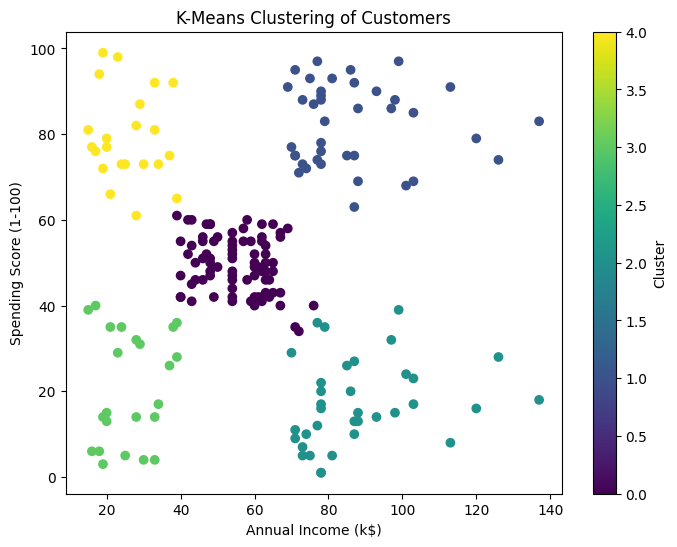

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering of Customers')
plt.colorbar(label='Cluster')
plt.show()

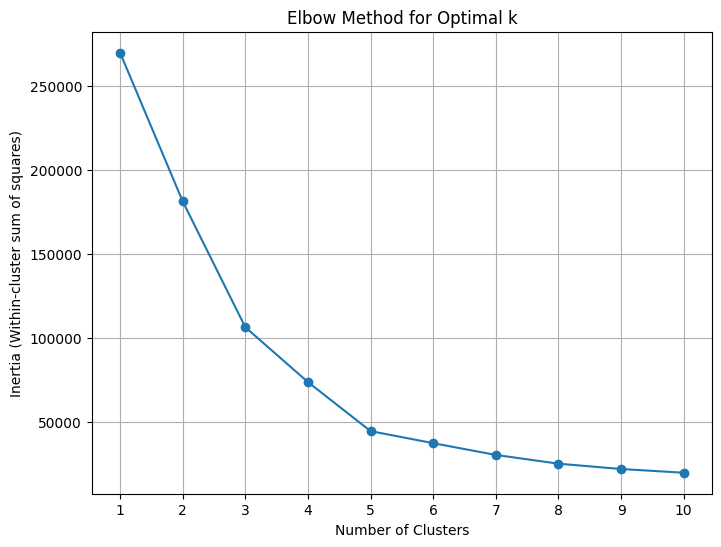

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the relevant columns for clustering (same as before)
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Calculate inertia for a range of cluster numbers
inertia = []
range_n_clusters = range(1, 11) # Test 1 to 10 clusters

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

### **APRIORI ALGORITHM**

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
df1 = pd.read_csv('/content/Groceries_dataset.csv',encoding="ISO-8859-1")
df1.head((100))

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
95,2560,17-05-2015,sausage
96,1503,25-07-2015,chicken
97,2555,23-12-2015,whole milk
98,3645,12-12-2015,citrus fruit


In [ ]:
df1.itemDescription.value_counts().head(5)

,count
itemDescription,
whole milk,2502
other vegetables,1898
rolls/buns,1716
soda,1514
yogurt,1334


In [ ]:
df1= df1[df1.itemDescription== 'whole milk']

In [ ]:
df1['itemDescription']= df1['itemDescription'].str.strip()

/tmp/ipython-input-27-61392292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['itemDescription']= df1['itemDescription'].str.strip()


In [ ]:
df1[df1.itemDescription == 'whole milk'].head(10)

,Member_number,Date,itemDescription
1,2552,05-01-2015,whole milk
4,3037,01-02-2015,whole milk
8,2762,20-03-2015,whole milk
21,2867,12-11-2015,whole milk
53,1061,05-09-2015,whole milk
54,3276,03-04-2015,whole milk
64,2632,02-03-2015,whole milk
70,4766,29-09-2015,whole milk
72,3860,05-05-2015,whole milk
97,2555,23-12-2015,whole milk


In [ ]:
# Assuming 'Quantity' is not available, we will use a count of itemDescription as values
# If you have a 'Quantity' column, replace 'itemDescription' with 'Quantity' and 'count' with 'sum'
basket = df1.pivot_table(index=['Member_number', 'Date', 'itemDescription'],
                            aggfunc='count',  # Use 'sum' if you have 'Quantity' column
                           fill_value=0)



In [ ]:
basket.head()

Empty DataFrame
Columns: []
Index: [(1000, 2014-06-24 00:00:00, whole milk), (1000, 2015-03-15 00:00:00, whole milk), (1001, 2014-02-07 00:00:00, whole milk), (1001, 2014-12-12 00:00:00, whole milk), (1002, 2014-04-26 00:00:00, whole milk)]

# **PCA**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [ ]:
file_path = '/content/Iris.csv'
df2 = pd.read_csv(file_path)

In [ ]:
df2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Before applying PCA, it's a good practice to scale the features so that each feature contributes equally to the principal components.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the features to scale (excluding the 'Id' and 'Species' columns)
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df2[features]

# Scale the features
X_scaled = StandardScaler().fit_transform(X)

# Display the first few rows of the scaled data (as a numpy array)
print("Scaled data (first 5 rows):\n", X_scaled[:5])

Scaled data (first 5 rows):
 [[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)

# Fit and transform the scaled data
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame from the principal components
pca_df = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])

# Add the 'Species' column back for analysis and visualization
pca_df['Species'] = df2['Species']

# Display the first few rows of the PCA DataFrame
display(pca_df.head())

# Display the explained variance ratio by each component
print("\nExplained variance ratio by principal components:\n", pca.explained_variance_ratio_)

,principal component 1,principal component 2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa



Explained variance ratio by principal components:
 [0.72770452 0.23030523]


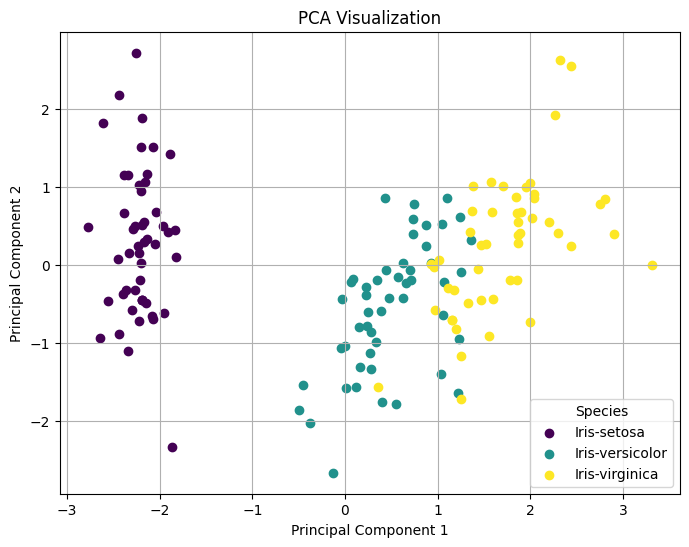

In [ ]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy for linspace

plt.figure(figsize=(8, 6))

if 'Species' in pca_df.columns:
    unique_species = pca_df['Species'].unique()
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_species))) # Use a colormap

    for i, species in enumerate(unique_species):
        # Plot data points for each species
        plt.scatter(pca_df[pca_df['Species'] == species]['principal component 1'],
                    pca_df[pca_df['Species'] == species]['principal component 2'],
                    color=colors[i],
                    label=species) # Use the species name as the label

    plt.legend(title="Species") # Create the legend from the labels assigned in the loop
else:
    plt.scatter(pca_df['principal component 1'], pca_df['principal component 2'])


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.grid(True)
plt.show()